In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
save_dir = "far"
events_in_this_sim = 500e6

In [4]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
if(save_dir == "far"):
    inFile_k100 = '%s/Ge_activation/k100_500M_Ge_Activation_far.root'%(dir_)
elif(save_dir == "with_shield"):
    inFile_k100 = '%s/Ge_activation/k100_500M_Ge_Activation_near.root'%(dir_)
else:
    print("Incorrect option")

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

# EV = tree_k100["EV"].array(library="np")
# #EV = EV - 1
# Type = tree_k100["Type"].array(library="np")
# TS = tree_k100["TS"].array(library="np")
# E1 = tree_k100["E1"].array(library="np")
# D3 = tree_k100["D3"].array(library="np")
# X3 = tree_k100["X3"].array(library="np")
# Y3 = tree_k100["Y3"].array(library="np")
# Z3 = tree_k100["Z3"].array(library="np")
# DT = tree_k100["DT"].array(library="np")
# nCap = tree_k100["nCap"].array(library="np")
# time1 = tree_k100["time1"].array(library="np")
# P = tree_k100["P"].array(library="np")

k100 = pd.DataFrame( {'EV' : tree_k100["EV"].array(library="np"),
                  'Type' : tree_k100["Type"].array(library="np"),
                      'TS' : tree_k100["TS"].array(library="np"),
                  'E1' : tree_k100["E1"].array(library="np"),
                  'D3' : tree_k100["D3"].array(library="np"),
                      'X3' : tree_k100["X3"].array(library="np"),
                      'Y3' : tree_k100["Y3"].array(library="np"),
                      'Z3' : tree_k100["Z3"].array(library="np"),
                      'DT' : tree_k100["DT"].array(library="np"),
                     'nCap' : tree_k100["nCap"].array(library="np"),
                      'P' : tree_k100["P"].array(library="np"),
                     'time1' : tree_k100["time1"].array(library="np")}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100.head(5)

,EV,Type,TS,E1,D3,X3,Y3,Z3,DT,nCap,P,time1,Edep,flag
0,746,"[2112, 2112, 2112, 2112, 127053, 127053, 23011...","[100029, 100030, 100031, 100033, 1200001, 1200...","[0.0001099772, 9.81041e-05, 9.662213e-05, 9.66...","[0.0, 0.0, 0.0, 0.0, 1.5477885e-06, 0.0, 1.191...","[-397.3939, -440.06323, -422.77402, -422.77402...","[26.759315, -4.5671806, -50.640343, -50.640343...","[-361.39484, -346.05392, -351.09808, -351.0980...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 100000, 100000, 100000, 100000, 0]","[3584.019, 3986.303, 4350.147, 4350.147, 3986....",1.346057e-05,False
1,840,"[2112, 2112, 22, 11, 11, 11, 11, 11, 11, 11, 2...","[100026, 100027, 1400001, 2300001, 2200001, 21...","[1.0800332, 1.0746933, 0.20285997, 2.648e-05, ...","[0.0, 0.0, 0.00012598, 2.648e-05, 1.802e-05, 2...","[-366.5811, -384.46555, -387.814, -387.814, -3...","[78.79468, 60.162056, 57.471764, 57.471764, 57...","[272.15, 267.9256, 260.67575, 260.67575, 260.6...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 100000, 1400000, 1400000, 1400000, 1400...","[112.75203, 114.578766, 114.60687, 114.60687, ...",4.115906e-01,False
2,1187,"[2112, 2112, 22, 22, 11, 11, 11, 11, 11, 11, 1...","[100028, 100030, 1600005, 1600006, 9400001, 93...","[2.5183594e-05, 2.5183594e-05, 0.8732961, 0.46...","[0.0, 0.0, 0.0, 0.00014349, 2.648e-05, 2.826e-...","[-346.075, -346.075, -358.43454, -363.63937, -...","[19.166346, 19.166346, -23.184185, -38.71972, ...","[297.72208, 297.72208, 215.0488, 215.31537, 21...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 100000, 100000, 1600000, 1600000, 16000...","[72190.2, 72190.2, 73827.234, 73827.29, 73827....",8.732961e-01,False
3,1455,"[-12, -12, -12]","[15600007, 15600009, 15600008]","[1.6390102, 1.6390102, 1.6390102]","[0.0, 0.0, 0.0]","[-490.34903, -490.34903, -490.34903]","[-95.3874, -95.3874, -95.3874]","[-290.96365, -290.96365, -290.96365]","[1001, 1001, 1002]","[0, 0, 0]","[15400000, 15400000, 15400000]","[88339080000.0, 88339080000.0, 88339080000.0]",0.000000e+00,False
4,2675,"[2112, 2112, 2112, 2112, 23011, 23011, 23011, ...","[100187, 100188, 100189, 100191, 17200001, 172...","[7.4742275e-08, 5.666402e-08, 5.769857e-08, 5....","[0.0, 0.0, 0.0, 0.0, 7.46687e-09, 0.0, 3.15494...","[-377.9255, -383.98035, -391.786, -391.786, -3...","[-13.049531, -8.498379, -1.0886906, -1.0886906...","[-334.63907, -345.2013, -365.119, -365.119, -3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 100000, 100000, 100000, 100000, 0]","[798137.94, 802085.5, 808899.7, 808899.7, 8020...",3.901637e-08,False


In [38]:
k100[k100.flag == True].EV[0:20]

8       8046
19     15201
21     15520
22     15612
23     16324
26     18904
32     23018
33     23544
35     23985
37     25208
39     25659
40     25956
41     26352
55     33756
62     35591
83     46613
87     49172
89     50490
92     53456
104    58243
Name: EV, dtype: int64

In [24]:
index = np.where(k100.iloc[19].nCap == 1)[0][0]
k100.iloc[19].Type[index+1]

128053

In [71]:
k100[k100.isotope == 71032].EV[0:10]

7717     916651
8838     470865
11565    852187
26111    273636
35116    803654
57526    268146
59778    392185
61745    378779
66358    685035
90083    878262
Name: EV, dtype: int64

In [74]:
#k100.iloc[19].nCap
k = 26111
for i in range(len(k100.iloc[k].nCap)):
    print('nCap : Type : P : E1 : time1 :: %d : %d : %d : %d : %0.2f : %0.1f'%(k100.iloc[k].nCap[i],k100.iloc[k].Type[i],k100.iloc[k].P[i],k100.iloc[k].TS[i],k100.iloc[k].E1[i],k100.iloc[k].time1[i]/(1e9*60*60*24)))

nCap : Type : P : E1 : time1 :: 1 : 2112 : 0 : 100136 : 0.00 : 0.0
nCap : Type : P : E1 : time1 :: 0 : 71032 : 100000 : 9200001 : 0.00 : 0.0
nCap : Type : P : E1 : time1 :: 0 : 71032 : 100000 : 9200002 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 12 : 9200000 : 10100001 : 0.22 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 71031 : 9200000 : 10000001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 71031 : 9200000 : 10000002 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9900001 : 0.01 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9800001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9700001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9600001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9500001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9400001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 11 : 9200000 : 9300001 : 0.00 : 8.2
nCap : Type : P : E1 : time1 :: 0 : 22 : 100000 : 910000

In [5]:
def neutronE(df_):
    #a = (np.dstack((df_.DT,df_.D3)))[0]
    indices = np.where(df_.Type == 2112)[0]
    if(len(indices)):
        return df_.E1[indices[0]]
    else:
        return -1

In [6]:
def isotope(df_):
    #a = (np.dstack((df_.DT,df_.D3)))[0]
    if(df_.flag == True):
        index = np.where(df_.nCap == 1)[0][0]
        return df_.Type[index+1]
    else:
        return -1


In [7]:
def nCap_gamma(df_):
    gammas = []
    if(df_.flag == True):
        index = np.where(df_.nCap == 1)[0][0]
        if(df_.Type[index] != 2112):
            print ('Capture without neutron?')
            sys.exit(0)
        track = int(df_.TS[index]/100000)
        
        indices = np.where(df_.Type == 22)[0]
        for i in indices:
            track_temp = int(df_.TS[i]/100000)*100000
            step_temp = df_.TS[i] - (track_temp)
            if((df_.P[i] == track*1e5) & (step_temp == 1)):
                gammas.append(df_.E1[i])
    return gammas

In [12]:
def captureLocation(df_):
    loc = []
    if(df_.flag == False):
        loc.append(-999.)
        loc.append(-999.)
        loc.append(-999.)
        return loc
    else:
        index = np.where(df_.nCap == 1)[0][0]
        loc.append(df_.X3[index])
        loc.append(df_.Y3[index])
        loc.append(df_.Z3[index])
        return loc


In [19]:
def neutronLocation(df_):
    loc = []
    indices = np.where(df_.Type == 2112)[0]
    if(len(indices)):
        index = indices[0]
        if(df_.DT[index] == 1):
            loc.append(df_.X3[index])
            loc.append(df_.Y3[index])
            loc.append(df_.Z3[index])
            return loc
    loc.append(-999.)
    loc.append(-999.)
    loc.append(-999.)
    return loc
        

In [8]:
k100['isotope'] = k100.apply(isotope,axis=1)

In [9]:
k100['gamma'] = k100.apply(nCap_gamma,axis=1)

In [10]:
k100['neutronE'] = k100.apply(neutronE,axis=1)

In [13]:
k100['capLoc'] = k100.apply(captureLocation,axis=1)

In [20]:
k100['neutronLoc'] = k100.apply(neutronLocation,axis=1)

In [11]:
k100.head(10)

,EV,Type,TS,E1,D3,X3,Y3,Z3,DT,nCap,P,time1,Edep,flag,isotope,gamma,neutronE
0,746,"[2112, 2112, 2112, 2112, 127053, 127053, 23011...","[100029, 100030, 100031, 100033, 1200001, 1200...","[0.0001099772, 9.81041e-05, 9.662213e-05, 9.66...","[0.0, 0.0, 0.0, 0.0, 1.5477885e-06, 0.0, 1.191...","[-397.3939, -440.06323, -422.77402, -422.77402...","[26.759315, -4.5671806, -50.640343, -50.640343...","[-361.39484, -346.05392, -351.09808, -351.0980...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 100000, 100000, 100000, 100000, 0]","[3584.019, 3986.303, 4350.147, 4350.147, 3986....",1.346057e-05,False,-1,[],1.099772e-04
1,840,"[2112, 2112, 22, 11, 11, 11, 11, 11, 11, 11, 2...","[100026, 100027, 1400001, 2300001, 2200001, 21...","[1.0800332, 1.0746933, 0.20285997, 2.648e-05, ...","[0.0, 0.0, 0.00012598, 2.648e-05, 1.802e-05, 2...","[-366.5811, -384.46555, -387.814, -387.814, -3...","[78.79468, 60.162056, 57.471764, 57.471764, 57...","[272.15, 267.9256, 260.67575, 260.67575, 260.6...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 100000, 1400000, 1400000, 1400000, 1400...","[112.75203, 114.578766, 114.60687, 114.60687, ...",4.115906e-01,False,-1,[],1.080033e+00
2,1187,"[2112, 2112, 22, 22, 11, 11, 11, 11, 11, 11, 1...","[100028, 100030, 1600005, 1600006, 9400001, 93...","[2.5183594e-05, 2.5183594e-05, 0.8732961, 0.46...","[0.0, 0.0, 0.0, 0.00014349, 2.648e-05, 2.826e-...","[-346.075, -346.075, -358.43454, -363.63937, -...","[19.166346, 19.166346, -23.184185, -38.71972, ...","[297.72208, 297.72208, 215.0488, 215.31537, 21...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 100000, 100000, 1600000, 1600000, 16000...","[72190.2, 72190.2, 73827.234, 73827.29, 73827....",8.732961e-01,False,-1,[],2.518359e-05
3,1455,"[-12, -12, -12]","[15600007, 15600009, 15600008]","[1.6390102, 1.6390102, 1.6390102]","[0.0, 0.0, 0.0]","[-490.34903, -490.34903, -490.34903]","[-95.3874, -95.3874, -95.3874]","[-290.96365, -290.96365, -290.96365]","[1001, 1001, 1002]","[0, 0, 0]","[15400000, 15400000, 15400000]","[88339080000.0, 88339080000.0, 88339080000.0]",0.000000e+00,False,-1,[],-1.000000e+00
4,2675,"[2112, 2112, 2112, 2112, 23011, 23011, 23011, ...","[100187, 100188, 100189, 100191, 17200001, 172...","[7.4742275e-08, 5.666402e-08, 5.769857e-08, 5....","[0.0, 0.0, 0.0, 0.0, 7.46687e-09, 0.0, 3.15494...","[-377.9255, -383.98035, -391.786, -391.786, -3...","[-13.049531, -8.498379, -1.0886906, -1.0886906...","[-334.63907, -345.2013, -365.119, -365.119, -3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 100000, 100000, 100000, 100000, 0]","[798137.94, 802085.5, 808899.7, 808899.7, 8020...",3.901637e-08,False,-1,[],7.474227e-08
5,4090,[-12],[13900029],[0.48821267],[0.0],[-31.234478],[7.1292233],[53.369],[1],[0],[13700000],[34617346000000.0],0.000000e+00,False,-1,[],-1.000000e+00
6,4333,"[2112, 2112, 127053, 127053]","[500019, 500020, 4200001, 4200002]","[0.17044076, 0.16788474, 0.0025566486, 0.0]","[0.0, 0.0, 0.0025566486, 0.0]","[-497.59665, -498.475, -497.59665, -497.59665]","[-56.536697, -56.24294, -56.536697, -56.536697]","[-307.63303, -307.83514, -307.63303, -307.63303]","[1001, 1001, 1001, 1001]","[0, 0, 0, 0]","[100000, 100000, 500000, 500000]","[190.41266, 190.57996, 190.41266, 190.41266]",2.556649e-03,False,-1,[],1.704408e-01
7,5102,"[2112, 2112, 2112, 2112, 127053, 127053, 12705...","[400016, 400017, 400018, 400020, 3200001, 3200...","[1.8910681, 1.8888, 1.8762194, 1.8762194, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.012583566, 0.0, 0.00226...","[-373.63565, -400.32523, -362.0731, -362.0731,...","[32.527386, -16.468468, -98.27988, -98.27988, ...","[-286.33478, -287.45703, -272.04285, -272.0428...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[100000, 100000, 100000, 100000, 400000, 40000...","[71.2

In [14]:
k100[k100.isotope==71032].capLoc.iloc[:10]

7717       [-19.733404, 15.023327, 47.57562]
8838         [16.262938, 41.24979, 39.09707]
11565      [-2.9455018, 1.2165787, 37.60521]
26111      [-25.51502, 22.621975, 22.819794]
35116       [23.42844, 37.317577, 29.672886]
57526      [-42.239525, 3.216528, 36.038326]
59778     [-29.015795, 29.892748, 21.441679]
61745       [2.3296227, 48.53638, 39.211296]
66358       [-7.505583, 45.30622, 31.535503]
90083    [-30.433496, -16.576864, 28.594458]
Name: capLoc, dtype: object

In [30]:
k100[(k100.isotope != -1) & (k100.isotope != 128053) & (k100.isotope != 24011)].isotope

2469      74032
7717      71032
8838      71032
11565     71032
19054     74032
          ...  
975835    74032
976119    71032
977494    71032
977833    74032
978416    71032
Name: isotope, Length: 575, dtype: int64

In [60]:
k100[k100.isotope == 71032].gamma.explode()

7717      0.499896
7717      0.798884
7717      6.116934
8838      1.598546
8838      5.817169
            ...   
977494    0.747227
977494    0.631401
977494    6.036994
978416    0.499865
978416    6.915681
Name: gamma, Length: 368, dtype: object

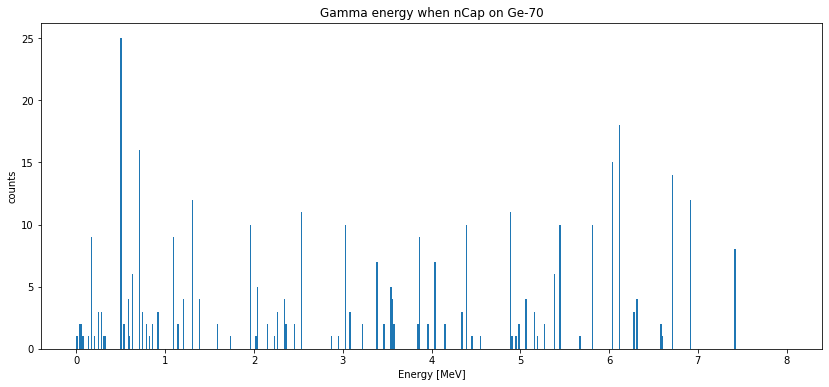

In [61]:
fig = plt.figure(figsize=(14.0,6.0))
Egamma = k100[k100.isotope == 71032].gamma.explode()
plt.hist(Egamma,bins=500, range=[0,8])
plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
plt.title("Gamma energy when nCap on Ge-70")
   

plt.show()

In [62]:
k100[k100.isotope == 71032].count()

EV         166
Type       166
TS         166
E1         166
D3         166
DT         166
nCap       166
P          166
time1      166
Edep       166
flag       166
isotope    166
gamma      166
dtype: int64

In [36]:
166/218

0.7614678899082569

In [64]:
1.84/0.76

2.4210526315789473

In [11]:
k100[k100.isotope == 71032].neutronE.explode()

7717      9.416328e-08
8838      4.921344e-08
11565     5.384777e-09
26111     1.854471e-08
35116     1.198237e-08
              ...     
972362    2.788352e-08
973845    3.298658e-08
976119    1.794751e-08
977494    4.867479e-08
978416    9.300481e-08
Name: neutronE, Length: 166, dtype: float64

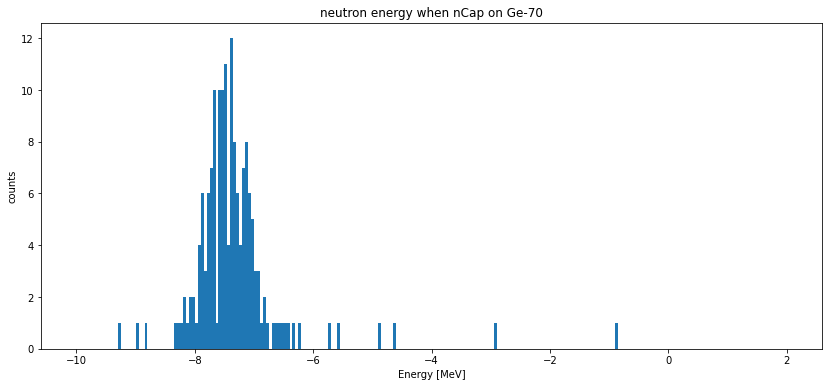

In [13]:
fig = plt.figure(figsize=(14.0,6.0))
Eneutron = k100[k100.isotope == 71032].neutronE.explode()
plt.hist(np.log10(Eneutron),bins=240, range=[-10,2])
plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
plt.title("neutron energy when nCap on Ge-70")
   

plt.show()

In [15]:
h_neutron_x_y_z_nCap = rt.TH3F("h_neutron_x_y_z_nCap","Position of neutron captures registered in Ge crystal",120,-60,60,120,-60,60,60,10.0, 70.0)
h_neutron_x_y_z_nCap.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_nCap.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_nCap.GetYaxis().SetTitle("z [mm]")

for location in k100[k100.isotope==71032].capLoc:
    x = location[0]
    y = location[1]
    z = location[2]
    h_neutron_x_y_z_nCap.Fill(x,y,z)
    

In [16]:
%jsroot on
c = rt.TCanvas()
h_neutron_x_y_z_nCap.Draw()
c.Draw()

In [21]:
h_neutron_x_y_z_neutron = rt.TH3F("h_neutron_x_y_z_neutron","Position of neutron entering in Ge crystal",120,-60,60,120,-60,60,60,10.0, 70.0)
h_neutron_x_y_z_neutron.GetXaxis().SetTitle("x [mm]")
h_neutron_x_y_z_neutron.GetYaxis().SetTitle("y [mm]")
h_neutron_x_y_z_neutron.GetYaxis().SetTitle("z [mm]")

for location in k100.neutronLoc:
    x = location[0]
    y = location[1]
    z = location[2]
    if(x != -999):
        h_neutron_x_y_z_neutron.Fill(x,y,z)

In [22]:
c = rt.TCanvas()
h_neutron_x_y_z_neutron.Draw()
c.Draw()

In [23]:
Nneutron = 0
Nncap = 0
for i in tqdm(range(len(k100))):
    
    indices = np.where(k100.iloc[i].Type == 2112)[0]
    if( len(indices) == 0):
        if(k100.iloc[i].flag == True):
            print ('nCap without neutron for event %d'%(i))
            break
        continue
    if((k100.iloc[i].DT)[indices[0]] != 1):
        continue
    if(k100.iloc[i].neutronE > 1e-6):
        continue
    if(k100.iloc[i].neutronE == -1):
        print('Negative neutron energy for event %d'%(i))
    
    Nneutron += 1
    if(k100.iloc[i].isotope == 71032):
        Nncap += 1

cross_section = 111.59*(Nncap/Nneutron)
print('Nncap = ',Nncap)
print('Nneutron = ',Nneutron)
print('cross_section = ',cross_section)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 978833/978833 [00:58<00:00, 16771.87it/s]


Nncap =  144
Nneutron =  1650
cross_section =  9.738763636363638


In [24]:
144/218

0.6605504587155964